In [2]:
# Load libraries
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from scipy import ndimage
import matplotlib.pylab as pylab
from shapely.geometry import Point

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 72

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context(context="paper", font_scale=1.5, rc=None)
sns.set(font="serif")

import plotly.express as px
import plotly.graph_objects as go

import geopandas as gpd
from geodatasets import get_path

import libpysal as ps
from libpysal  import weights
from libpysal.weights import Queen

import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights

from giddy.directional import Rose

import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer, LineLocation

from spreg import OLS
from spreg import MoranRes
from spreg import ML_Lag
from spreg import ML_Error 

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap

import warnings
warnings.filterwarnings('ignore') 
import time


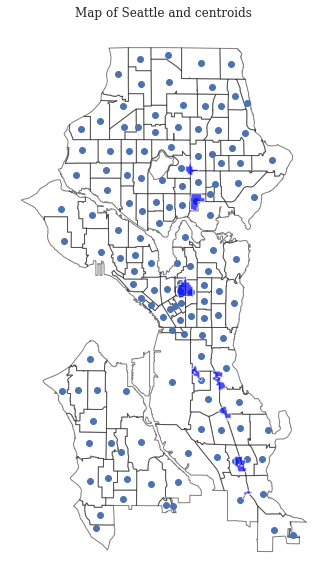

In [3]:
file2=open("C:/Users/NGong/OneDrive - Eastside Preparatory School/Documents/IS stuff/shapefile_storage/2010HousingPerCity.geojson")
gdf1  = gpd.read_file(file2)
fig, ax = plt.subplots(figsize=(10, 10))
gdf1.plot(color = 'white', edgecolor = 'black', ax = ax, alpha=0.5)
gdf1.centroid.plot(ax=ax)
file3=open("C:/Users/NGong/OneDrive - Eastside Preparatory School/Documents/IS stuff/shapefile_storage/lightrail.geojson")
gdf2  = gpd.read_file(file3)
gdf2.plot(color = 'blue', ax = ax, alpha=0.7)
ax.set_title('Map of Seattle and centroids', fontsize=12)
ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()


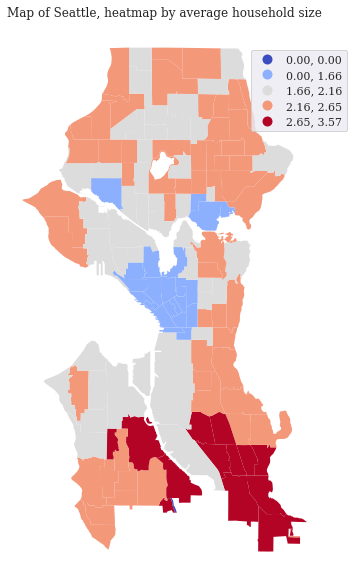

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf1.plot(column='Average_Household_Size', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=ax)
ax.set_title('Map of Seattle, heatmap by average household size', fontsize=12)
ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()


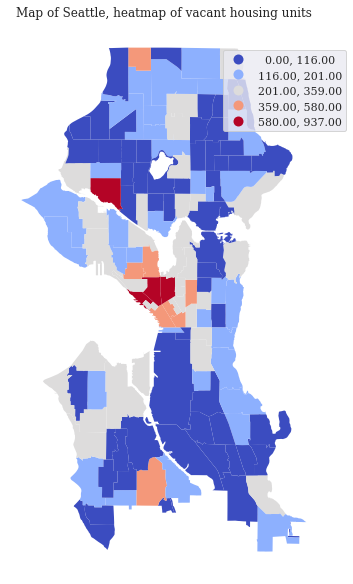

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf1.plot(column='Vacant_Housing_Units', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=ax)
ax.set_title('Map of Seattle, heatmap of vacant housing units', fontsize=12)
ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()

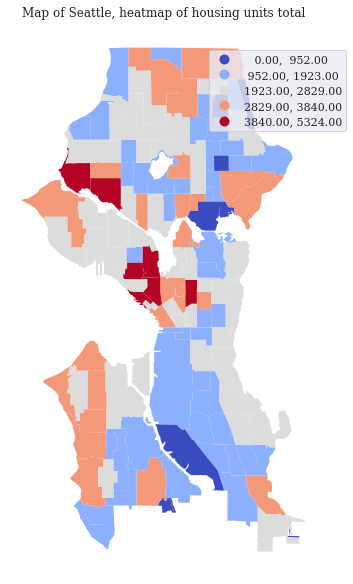

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf1.plot(column='Housing_Units_Total', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=ax)
ax.set_title('Map of Seattle, heatmap of housing units total', fontsize=12)
ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()

In [7]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()

In [8]:
df=pd.read_csv("C:/Users/NGong/OneDrive - Eastside Preparatory School/Documents/IS stuff/SPD_Crime_Data__2008-Present_20240914.csv")


In [9]:
print(df.head())

  Report Number   Offense ID  Offense Start DateTime    Offense End DateTime   
0   2020-044620  12605873663  02/05/2020 10:10:00 AM                     NaN  \
1   2020-044452  12605598696  02/03/2020 08:00:00 AM  02/04/2020 08:00:00 AM   
2   2020-044465  12605567653  02/02/2020 08:30:00 PM  02/02/2020 09:30:00 PM   
3   2020-044225  12605174036  02/05/2020 01:17:00 AM  02/05/2020 02:21:00 AM   
4   2020-044076  12605081469  02/05/2020 12:51:21 AM                     NaN   

          Report DateTime Group A B Crime Against Category   
0  02/05/2020 11:24:31 AM         A                SOCIETY  \
1  02/05/2020 10:06:28 AM         A               PROPERTY   
2  02/05/2020 09:39:33 AM         A               PROPERTY   
3  02/05/2020 03:30:55 AM         A               PROPERTY   
4  02/05/2020 12:51:31 AM         B                SOCIETY   

                       Offense Parent Group   
0                    DRUG/NARCOTIC OFFENSES  \
1                             LARCENY-THEFT   
2    

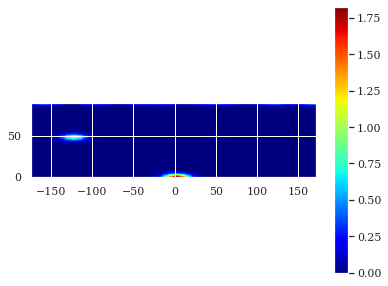

In [10]:
# Create a geometry column
df['geometry'] = df.apply(lambda row: Point(row['Longitude'],row['Latitude'], ), axis=1)
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')
# Set the CRS
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs(gdf2.crs)
heatmap(gdf, bins=50, smoothing=1.5)
